In [39]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import numpy as np


In [40]:
# Load a dataset from the OpenML repository
dataset = fetch_openml(name='mnist_784', version=1)

# Extract features and target variable
X = dataset.data/255.0
y = dataset.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
X.columns=feat_cols
df = pd.DataFrame(X,columns=feat_cols)

df['y'] = y
df['label'] = df['y'].apply(lambda i:int(i))
df=df.drop(columns=["y"])

print('Size of the dataframe: {}'.format(df.shape))

###[out] Size of the dataframe: (70000, 785)

Size of the dataframe: (70000, 785)


In [ ]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [42]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [ ]:
df.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
label       0
Length: 785, dtype: int64

In [33]:
#Apply PCA to the data and put the new components in the df under names of pca-one and pca-two and pca-three
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
df['pca-one']= pca_result[:,0]
df['pca-two']= pca_result[:,1]
df['pca-three']= pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [24]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

<Axes: xlabel='pca-one', ylabel='pca-two'>

In [13]:
print(len(rndperm))
print(len(df.loc[rndperm, 'pca-one']))
print(df.loc[rndperm, 'label'])

70000
70000
46730    8
48393    4
41416    8
34506    7
43725    7
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: label, Length: 70000, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

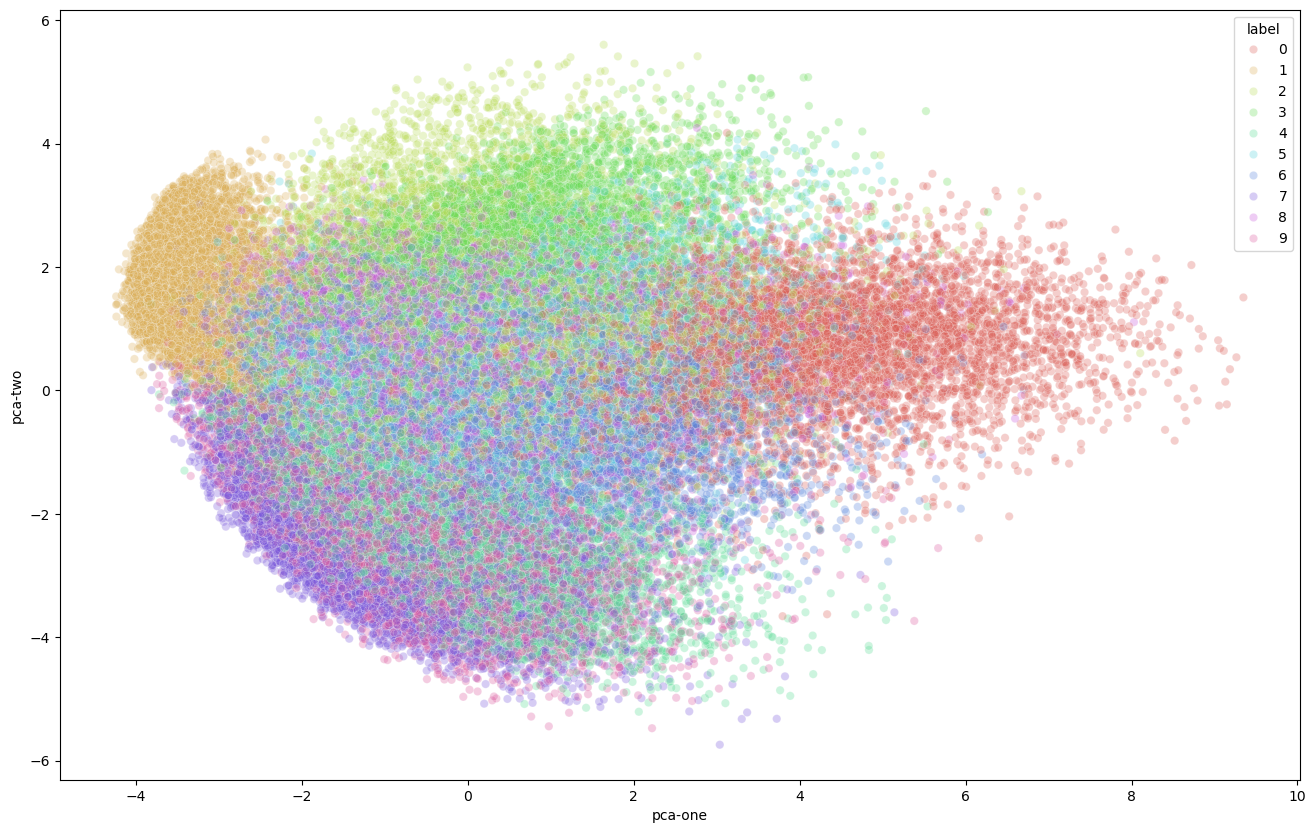

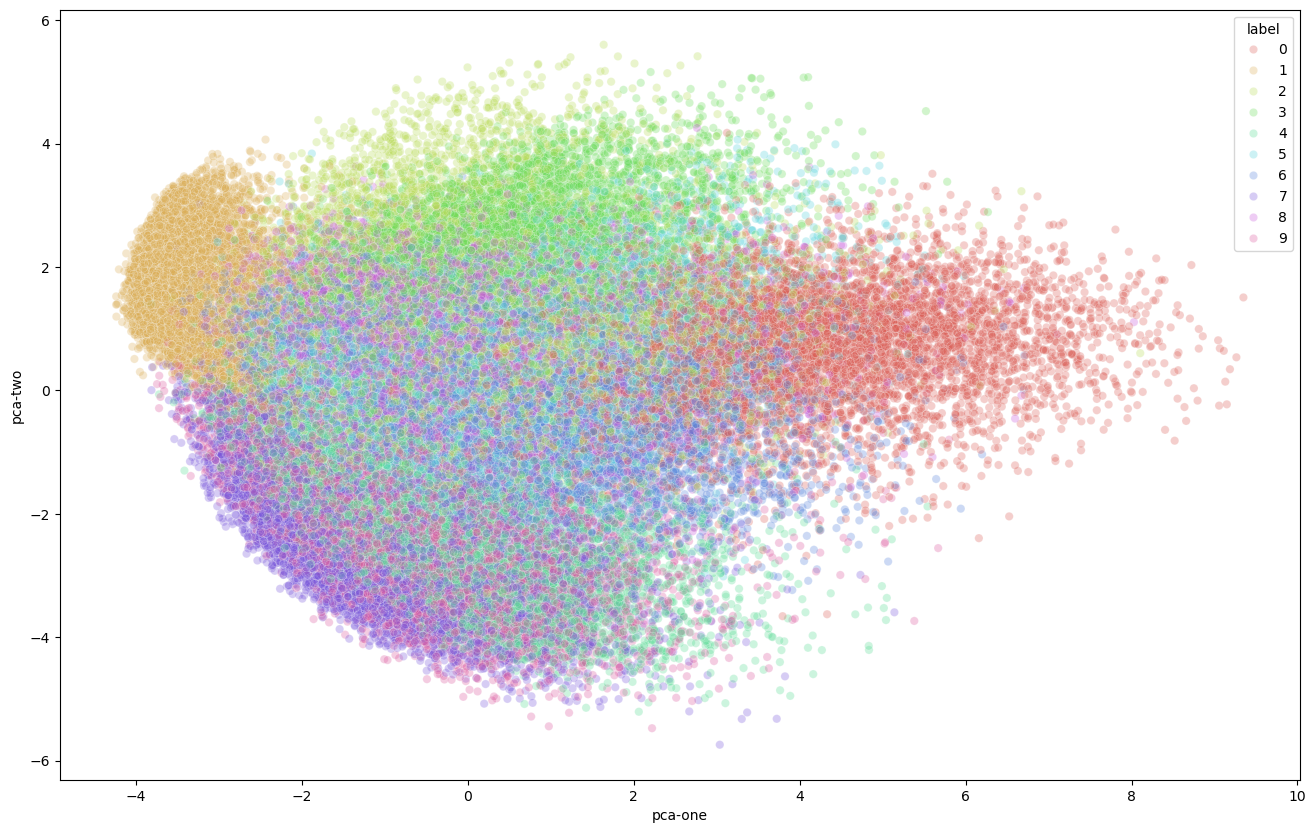

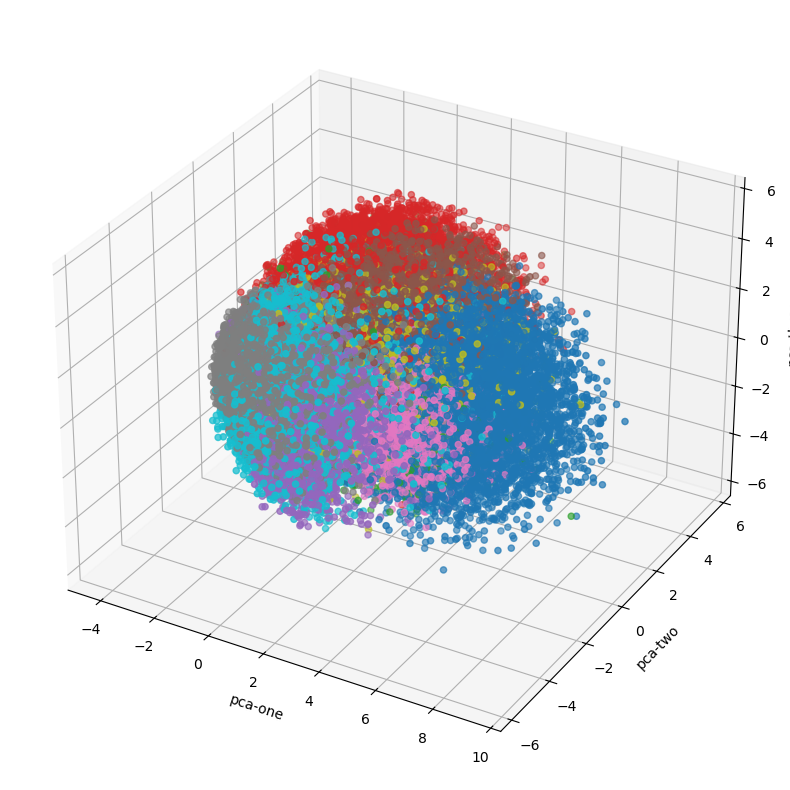

In [14]:
fig = plt.figure(figsize=(16, 10))
#ndperm = np.random.permutation(df.shape[0])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=df.loc[rndperm, 'pca-one'],
    ys=df.loc[rndperm, 'pca-two'],
    zs=df.loc[rndperm, 'pca-three'],
    c=list(df.loc[rndperm, 'label']),
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [34]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [35]:
#apply Tsne with perplexity=40, n_iter=300 to the data_subset and see the visualiztions
TSNE = TSNE(
    n_components=2,
    perplexity=40,
    n_iter=300
)
tsne_result = TSNE.fit_transform(data_subset)
df_subset['tsne-one'] = tsne_result[:,0]
df_subset['tsne-two'] = tsne_result[:,1]


c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [36]:
df_subset['tsne-2d-one'] = tsne_result[:,0]
df_subset['tsne-2d-two'] = tsne_result[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

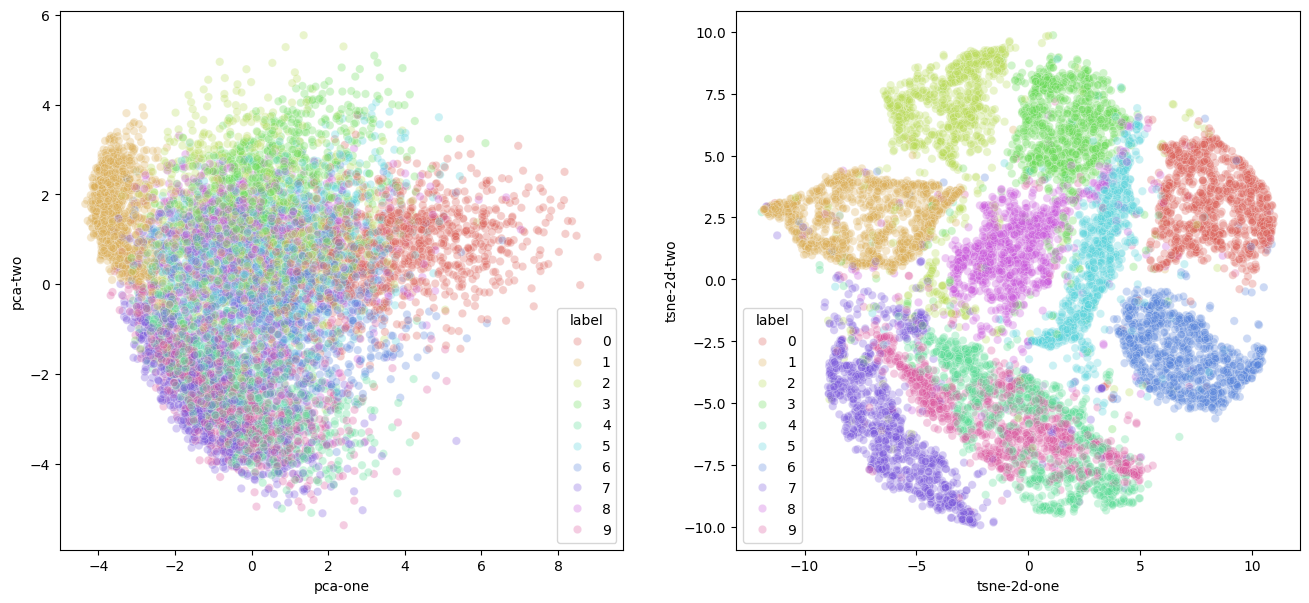

In [ ]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### We can now take the recommendations to heart and reduce the number of dimensions before feeding the data into the t-SNE algorithm. We’ll use PCA again for this. We will first create a new data set containing the fifty dimensions generated by the PCA reduction algorithm. Then, we can use this dataset to perform the t-SNE.

In [43]:
#Take 50 components from pca
pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_subset)

In [44]:
# Apply Tsne to the 50 components take from PCA
TSNE = TSNE(
    n_components=2,
    perplexity=40,
    n_iter=300
)
tsne_result = TSNE.fit_transform(data_subset)
df_subset['tsne-one'] = tsne_result[:,0]
df_subset['tsne-two'] = tsne_result[:,1]

c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [46]:
plt.figure(figsize=(16,7))
df_subset['tsne-pca50-one'] = tsne_result[:,0]
df_subset['tsne-pca50-two'] = tsne_result[:,1]

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>